# **✅ 📄 Langkah 1: Setup & Import Library**

In [8]:
# Install library jika belum
!pip install pandas scikit-learn matplotlib seaborn

# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [10]:
from google.colab import files
uploaded = files.upload()


Saving youtube_comments.csv to youtube_comments.csv


In [11]:
df = pd.read_csv('youtube_comments.csv')  # tanpa /mnt/data karena sudah di-upload manual


# **✅ 📊 Langkah 2: Baca dan Labeling Sentimen**

In [13]:
# Baca dataset
df = pd.read_csv('youtube_comments.csv')  # ✅ Benar untuk Colab
df.dropna(inplace=True)

# Label sentimen berdasarkan kata kunci (sangat dasar)
def label_sentiment(text):
    text = text.lower()
    if any(word in text for word in ['bagus', 'baik', 'mantap', 'keren', 'top', 'suka']):
        return 'positif'
    elif any(word in text for word in ['jelek', 'buruk', 'macet', 'benci', 'parah', 'nggak suka']):
        return 'negatif'
    else:
        return None

df['sentiment'] = df['comment'].apply(label_sentiment)
df = df[df['sentiment'].notnull()]

print("Jumlah data setelah labeling:")
print(df['sentiment'].value_counts())
df.head()

Jumlah data setelah labeling:
sentiment
positif    52
negatif     1
Name: count, dtype: int64


,video_url,comment,sentiment
3,https://www.youtube.com/watch?v=aA98ajOleo0,Semakin keren trans jatim..\nSemoga d'tahun² b...,positif
4,https://www.youtube.com/watch?v=aA98ajOleo0,Jalur Babat Lamongan Gresik Surabaya sangat bu...,positif
8,https://www.youtube.com/watch?v=aA98ajOleo0,Semoga makin bnyk masyarakat yg naik transport...,positif
17,https://www.youtube.com/watch?v=aA98ajOleo0,Mantap mas Ahmad Wildani ... keren drivernya i...,positif
19,https://www.youtube.com/watch?v=aA98ajOleo0,Keren mase....mudah2an nganjuk kediri jga ada ...,positif


# **✅ ⚖️ Langkah 3: Balancing Data**

In [14]:
# Pisahkan berdasarkan label
positif = df[df['sentiment'] == 'positif']
negatif = df[df['sentiment'] == 'negatif']

# Samakan jumlahnya (undersampling / oversampling)
min_count = min(len(positif), len(negatif))
positif_bal = resample(positif, replace=False, n_samples=min_count, random_state=42)
negatif_bal = resample(negatif, replace=False, n_samples=min_count, random_state=42)

# Gabungkan
df_balanced = pd.concat([positif_bal, negatif_bal])
print("\nJumlah data setelah balancing:")
print(df_balanced['sentiment'].value_counts())



Jumlah data setelah balancing:
sentiment
positif    1
negatif    1
Name: count, dtype: int64


# **✅ 🔍 Langkah 4: Analisis Sentimen (Multi-ABSA sederhana)**


Classification Report:
              precision    recall  f1-score   support

     negatif       1.00      1.00      1.00         1
     positif       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



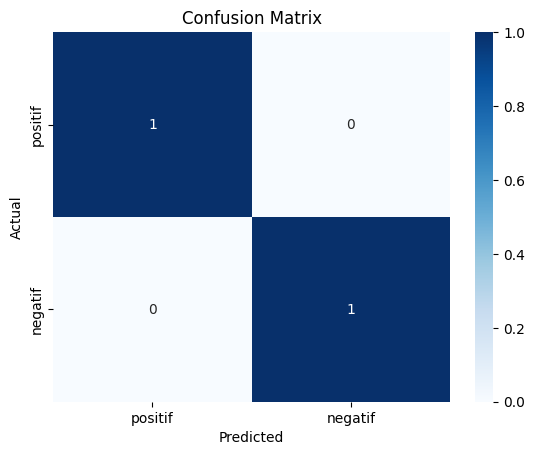

In [16]:
# Feature Extraction
X = df_balanced['comment']
y = df_balanced['sentiment']

# TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Klasifikasi langsung
model = LogisticRegression()
model.fit(X_tfidf, y)

# Prediksi ulang ke data yang sama
y_pred = model.predict(X_tfidf)

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y, y_pred, labels=['positif', 'negatif'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positif', 'negatif'], yticklabels=['positif', 'negatif'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
